# Algorithms and Data Structures II, U3P3
## Components:
### Lucas Morais Freire
### (joao)
### (joao)
# Case Study: constructing a network of wikipedia pages

In this notebook, we will be Building a directed graph that represents a network of Wikipedia pages. A directed edge will exist between two pages if there is a link in the article's text for one of the pages to the other page. We will construct this network starting from a specific page we will be calling the seed, and using the wikipedia web scraping librabry to find out for which pages it has links for. First, we will be installing the needed library:

In [3]:
%pip install wikipedia
%pip install nxviz

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=cc536381710cbf715180031400c31ed7530f18e3b63842da2818202101b88090
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


We will use some other libraries to help us construct and vizualize the network better:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import wikipedia
from operator import itemgetter

The seed article chosen was "Maćedonce". Starting from it, we will scrape its web page and find links on the text. Some web pages have too many links in them, we need to avoid these pages as to not make our network too similar to a typical wikipedia network. these will be the STOPS set.

In [ ]:
SEED = "Maćedonce".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

We will make a to do set of pages we have yet to scrape, and a list of tuples that tell us from which layer of the snowball we are in. We will also make a set that will contain the pages we have already processed.

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

We will create a directional graph utilizing the networkX library, and initialize the current layer and page to be the first tuple of our to do list (our seed).

In [ ]:
g = nx.DiGraph()
layer, page = todo_lst[0]

Now, we will construct the network:

In [ ]:
#%%time
# we dont want too many nodes, so we will limit the layers to our snowballing process to 3:
while layer < 2:
  # Remove the name page of the current page that is being processed from the to do list
  del todo_lst[0]
  done_set.add(page)

  # Show which page we have scraped
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

0 Maćedonce
1 Bogunovac
1 Borovac, Medveđa
1 Central European Summer Time
1 Central European Time
1 Crni Vrh, Medveđa
1 Daylight Saving Time
1 Districts Of Serbia
1 Donji Bučumet
1 Donji Gajtan
1 Gazdare
1 Geographic Coordinate System
1 Gornja Lapaštica
1 Gornji Bučumet
1 Gornji Gajtan
1 Grbavce
1 Gubavce
1 Gurgutovo
1 Jablanica District
1 Kapit, Medveđa
1 Lece
1 Mala Braina
Could not load Mala Braina
1 Marovac
1 Maćedonce (Retkocersko)
1 Medevce
1 Medveđa


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Medveđa
1 Mrkonje
1 Municipalities Of Serbia
1 Negosavlje
1 Petrilje
1 Poroštica (Medveđa)
1 Pusto Šilovo
1 Ravna Banja
1 Retkocer
1 Rujkovac
1 Serbia
1 Sijarina
1 Sijarinska Banja
1 Southern And Eastern Serbia
1 Sponce
1 Srednji Bučumet
1 Stara Banja
1 Statistical Office Of The Republic Of Serbia
1 Stubla (Medveđa)
1 Subdivisions Of Serbia
1 Svirce (Medveđa)
1 Time Zone
Could not load Time Zone
1 Tulare, Medveđa
1 Utc+1
1 Utc+2
1 Varadin
1 Velika Braina
1 Village
1 Vrapce, Medveđa
1 Čokotin
1 Đulekare


Now, let's check gow many nodes and edges we got:

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

3967 nodes, 7847 edges


In [ ]:
# make a copy of raw graph
original = g.copy()

In [ ]:
g = original.copy()
print(g)

DiGraph with 3967 nodes and 7847 edges


Because there are many different links that refer to the same page, and sometimes pages that refer to themselves, we need to clean the graph of such unnecessary duplicates and redundant edges:

In [ ]:
# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Administrative Division', 'Administrative Divisions'), ('Oblast', 'Oblasts'), ('Mayor', 'Mayors'), ('Miroslav Gospel', 'Miroslav Gospels'), ('Refugee', 'Refugees'), ('Ancient Greek', 'Ancient Greeks')]
[('Commander-In-Chief', 'Commander In Chief')]


In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))
nx.write_graphml(g, 'analysisGraph.graphml')

3960 nodes, 7840 edges


In [ ]:
g = nx.read_graphml('analysisGraph.graphml')
print(g)

DiGraph with 3962 nodes and 7856 edges


In [ ]:
import nxviz as nv
from nxviz import annotate, highlights
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import pandas as pd

c:\Users\glori\AppData\Local\Programs\Python\Python311\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


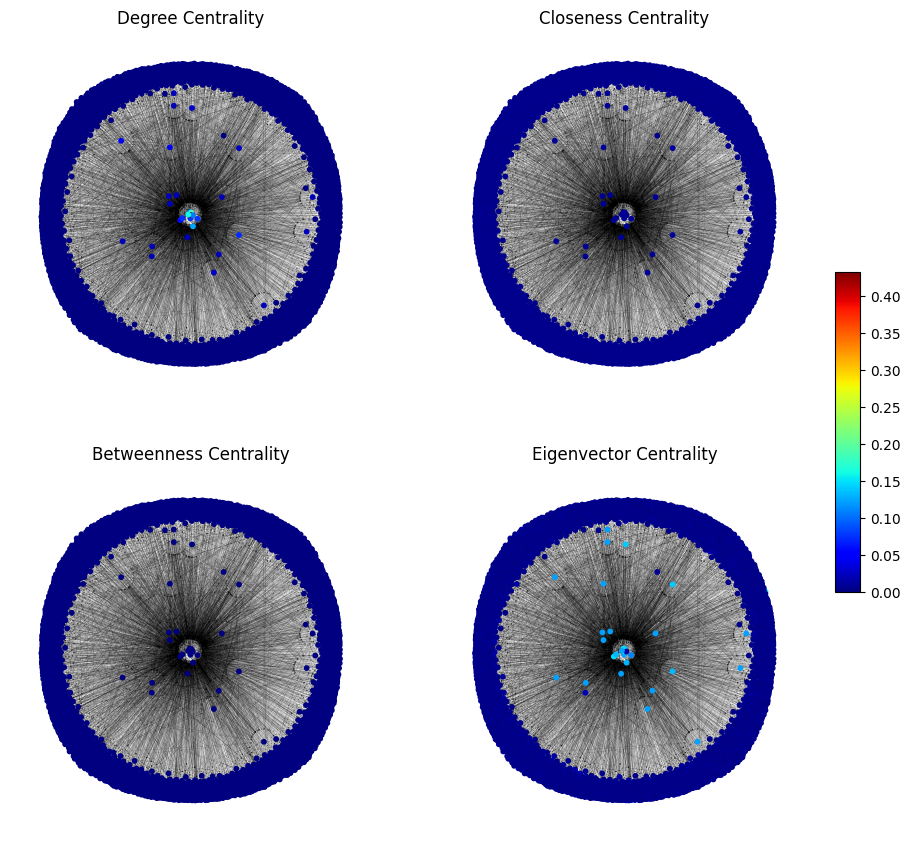

In [ ]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(2,2,figsize=(10,8))

# max value of metrics
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(g).items()]),
                      max([v for k, v in nx.degree_centrality(g).items()]),
                      max([v for k, v in nx.closeness_centrality(g).items()]),
                      max([v for k, v in nx.betweenness_centrality(g).items()])])

# layout position
pos = nx.spring_layout(g,seed=777,k=1)

# color of nodes
color_degree = list(dict(nx.degree_centrality(g)).values())
color_closeness = list(dict(nx.closeness_centrality(g)).values())
color_betweenness = list(dict(nx.betweenness_centrality(g)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(g)).values())
#
# draw edges
#
# degree centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4,
                       width = 0.075,
                       arrowsize=2,
                       ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4,
                       width = 0.075,
                       arrowsize=2,
                       ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4,
                       width = 0.075,
                       arrowsize=2,
                       ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4,
                       width = 0.075,
                       arrowsize=2,
                       ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_degree,
                 node_size=10,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_closeness,
                 node_size=10,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_betweenness,
                 node_size=10,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_color=color_eigenvector,
                 node_size=10,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centrality")
ax[0,1].set_title("Closeness Centrality")
ax[1,0].set_title("Betweenness Centrality")
ax[1,1].set_title("Eigenvector Centrality")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('network_graph_centralities.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

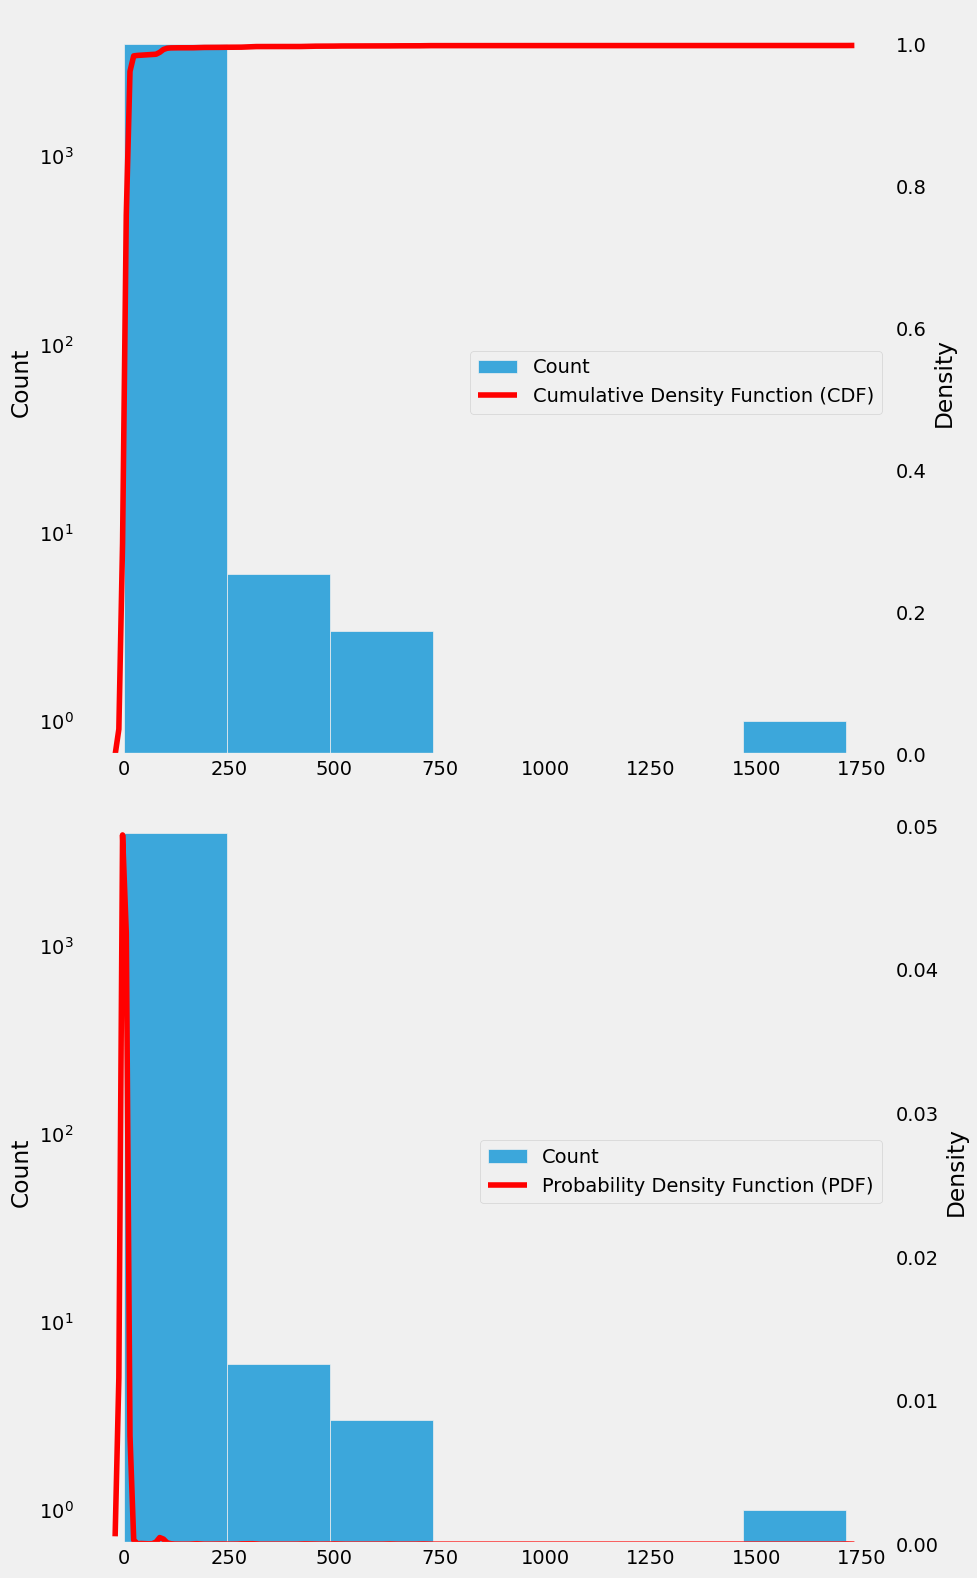

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

# Degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

# Create a new figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

# Plot the histogram with CDF overlay
sns.histplot(degree_sequence, bins=7, label="Count", ax=ax1)
ax3 = ax1.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax3,cumulative=True)

ax1.grid(False)
ax3.grid(False)
ax1.set_yscale("log")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc="center right")

# Plot the histogram with PDF overlay
sns.histplot(degree_sequence, bins=7, label="Count", ax=ax2)
ax4 = ax2.twinx()
sns.kdeplot(degree_sequence, color='r', label="Probability Density Function (PDF)", ax=ax4)

ax2.grid(False)
ax4.grid(False)
ax2.set_yscale("log")
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax4.legend(lines + lines2, labels + labels2, loc="center right")


# Display the plot
plt.tight_layout()
plt.savefig('graph_degree_densities.png', transparent=True, dpi=600, bbox_inches="tight")
plt.show()


In [ ]:
bc = pd.Series(nx.betweenness_centrality(g))
dc = pd.Series(nx.degree_centrality(g))
ec = pd.Series(nx.eigenvector_centrality(g))
cc = pd.Series(nx.closeness_centrality(g))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.000046,0.022986,0.121845,0.009093
1,0.000007,0.022228,0.121845,0.009093
2,0.000007,0.022480,0.121845,0.009093
3,0.000201,0.026774,0.141048,0.010770
4,0.000681,0.057590,0.148638,0.011135


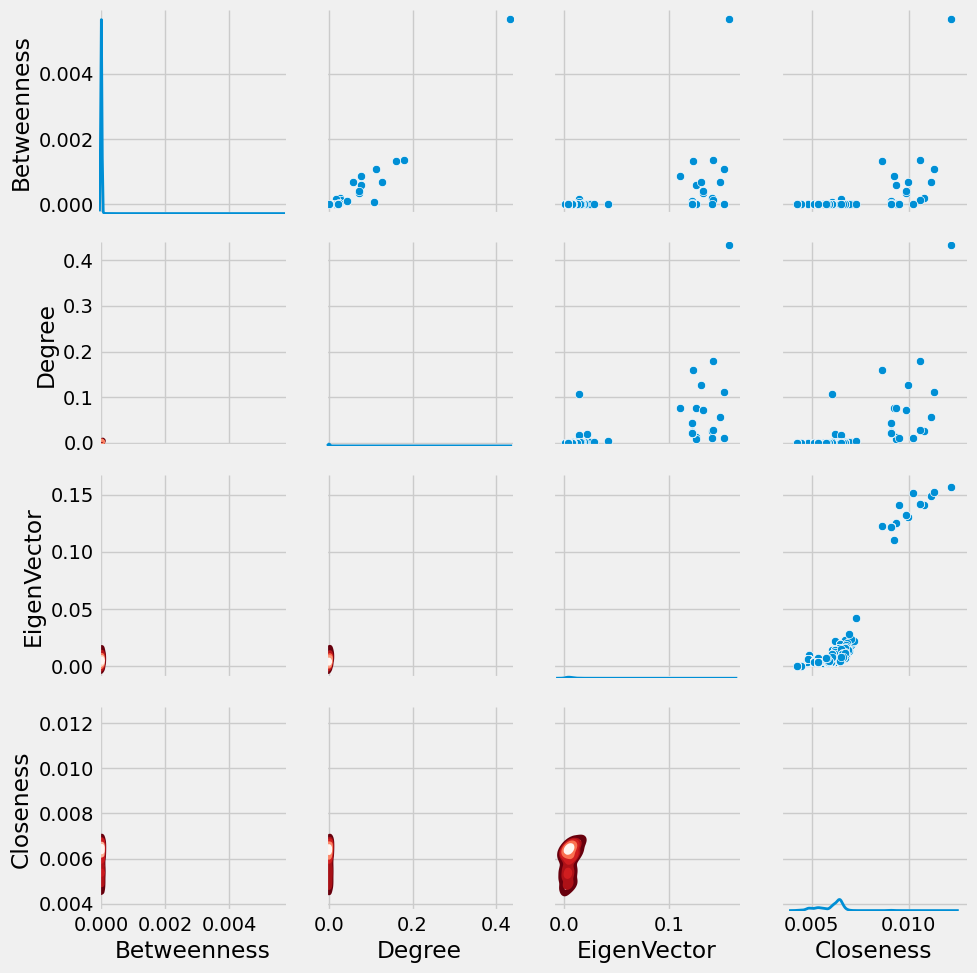

In [ ]:
from functools import partial

fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(partial(sns.kdeplot, levels=[0.1, 0.3, 0.5, 0.7, 0.9]), cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

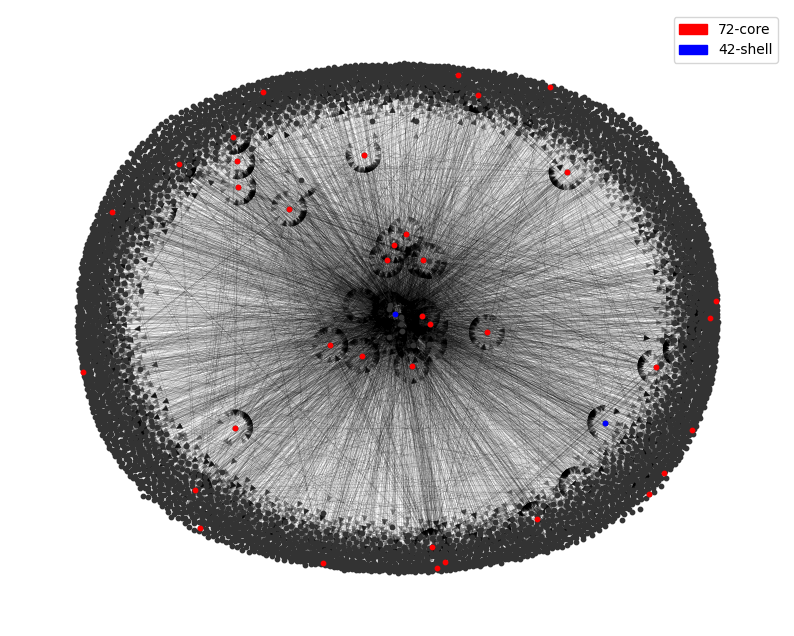

In [ ]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g_core_42 = nx.k_shell(g, 42)
g_core_72 = nx.k_core(g, 72)

# layout position
pos = nx.spring_layout(g,seed=123456789,k=1)

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       width=0.1,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                 pos=pos,
                 node_size=10,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g_core_42,
                 pos=pos,
                 node_size=10,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g_core_72,
                 pos=pos,
                 node_size=10,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='72-core')
blue_patch = mpatches.Patch(color='blue', label='42-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()


Building a pipeline class:

In [4]:
from functools import partial
import networkx as nx
import matplotlib.pyplot as plt
import wikipedia
from operator import itemgetter
import seaborn as sns
import nxviz as nv
from nxviz import annotate, highlights
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
class Wikipedia_Data_Pipeline:
    def __init__(self):
        self.tasks = []
        print('initiated')

    def task(self, depends_on=None):
        idx = 0
        if depends_on:
            idx = self.tasks.index(depends_on) + 1
        def inner(f):
            self.tasks.insert(idx, f)
            return f
        print(self.tasks)
        return inner
    def run(self, SEED, STOPS, n_layers):
        input_ = [SEED, STOPS, n_layers]
        print(self.tasks)
        for func in self.tasks:
            input_ = func(input_)

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


This class will wrap threee functions: data_collect(), data_trim() and generate_stats(). these functions need to work in such a way that the input of the next function is the output from the current function. The data_collect() function will take in the SEED for our snowballing process, the STOPS list and the amount of layers we want. It should return the raw graph.

In [5]:
SEED = "Maćedonce".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

Now, we wrap this step with a function definition and the pipeline wrapper.

In [10]:
ppl = Wikipedia_Data_Pipeline()

@ppl.task()
def data_collect(input_):
    SEED = input_[0]
    STOPS = input_[1]
    n_layers = input_[2]
    todo_lst = [(0, SEED)]
    todo_set = set(SEED)
    done_set = set()
    g = nx.DiGraph()
    layer, page = todo_lst[0]
    while layer < n_layers:
        del todo_lst[0]
        done_set.add(page)
        print(layer, page)
        try:
            wiki = wikipedia.page(page)
        except:
            print("Could not load", page)
            layer, page = todo_lst[0]
            continue

        for link in wiki.links:
            link = link.title()
            if link not in STOPS and not link.startswith("List Of"):
                if link not in todo_set and link not in done_set:
                    todo_lst.append((layer + 1, link))
                    todo_set.add(link)
                g.add_edge(page, link)
        layer, page = todo_lst[0]
    print('initial collection:',g)
    return g

initiated
[]


Now, for the cleaning step, we do the same:

In [11]:
@ppl.task(depends_on=data_collect)
def data_trim(g:nx.DiGraph):
    g.remove_edges_from(nx.selfloop_edges(g))
    duplicates = [(node, node + "s")
                for node in g if node + "s" in g
                ]
    for dup in duplicates:
        g = nx.contracted_nodes(g, *dup, self_loops=False)
    print(duplicates)
    duplicates = [(x, y) for x, y in
                [(node, node.replace("-", " ")) for node in g]
                    if x != y and y in g]
    print(duplicates)
    for dup in duplicates:
        g = nx.contracted_nodes(g, *dup, self_loops=False)
    nx.set_node_attributes(g, 0,"contraction")
    nx.set_edge_attributes(g, 0,"contraction")
    print('cleaned graph:', g)
    nx.write_graphml(g, 'analysisGraph.graphml')
    return g

[<function data_collect at 0x799b51f7d120>]


and for the data vizualization step:

In [12]:
@ppl.task(depends_on=data_trim)
def generate_stats(g:nx.DiGraph):
    g = nx.read_graphml('analysisGraph.graphml')
    # the eigenvector centrality of network(g)
    fig, ax = plt.subplots(2,2,figsize=(10,8))

    # max value of metrics
    max_centrality = max([max([v for k, v in nx.eigenvector_centrality(g).items()]),
                        max([v for k, v in nx.degree_centrality(g).items()]),
                        max([v for k, v in nx.closeness_centrality(g).items()]),
                        max([v for k, v in nx.betweenness_centrality(g).items()])])

    # layout position
    pos = nx.spring_layout(g,seed=777,k=1)

    # color of nodes
    color_degree = list(dict(nx.degree_centrality(g)).values())
    color_closeness = list(dict(nx.closeness_centrality(g)).values())
    color_betweenness = list(dict(nx.betweenness_centrality(g)).values())
    color_eigenvector = list(dict(nx.eigenvector_centrality(g)).values())
    #
    # draw edges
    #
    # degree centrality
    nx.draw_networkx_edges(g,
                        pos=pos,
                        alpha=0.4,
                        width = 0.075,
                        arrowsize=2,
                        ax=ax[0,0])

    # closeness centrality
    nx.draw_networkx_edges(g,
                        pos=pos,
                        alpha=0.4,
                        width = 0.075,
                        arrowsize=2,
                        ax=ax[0,1])

    # betweenness centrality
    nx.draw_networkx_edges(g,
                        pos=pos,
                        alpha=0.4,
                        width = 0.075,
                        arrowsize=2,
                        ax=ax[1,0])

    # eigenvector centrality
    nx.draw_networkx_edges(g,
                        pos=pos,
                        alpha=0.4,
                        width = 0.075,
                        arrowsize=2,
                        ax=ax[1,1])

    # draw nodes
    nodes = nx.draw_networkx_nodes(g,
                    pos=pos,
                    node_color=color_degree,
                    node_size=10,
                    cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                    ax=ax[0,0])
    nodes = nx.draw_networkx_nodes(g,
                    pos=pos,
                    node_color=color_closeness,
                    node_size=10,
                    cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                    ax=ax[0,1])
    nodes = nx.draw_networkx_nodes(g,
                    pos=pos,
                    node_color=color_betweenness,
                    node_size=10,
                    cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                    ax=ax[1,0])
    nodes = nx.draw_networkx_nodes(g,
                    pos=pos,
                    node_color=color_eigenvector,
                    node_size=10,
                    cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                    ax=ax[1,1])

    # eliminate axis
    ax[0,0].axis("off")
    ax[1,0].axis("off")
    ax[0,1].axis("off")
    ax[1,1].axis("off")

    ax[0,0].set_title("Degree Centrality")
    ax[0,1].set_title("Closeness Centrality")
    ax[1,0].set_title("Betweenness Centrality")
    ax[1,1].set_title("Eigenvector Centrality")


    # Create an unique colorbar
    # reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
    plt.subplots_adjust(bottom=0., right=0.92, top=1.)
    cax = plt.axes([0.95, 0.3, 0.025, 0.4])
    sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
    cbar=plt.colorbar(sm,cax)

    plt.savefig('network_graph_centralities.png', transparent=True,dpi=600,bbox_inches="tight")
    plt.show()
    plt.style.use("fivethirtyeight")

    # Degree sequence
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

    # Create a new figure and axes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

    # Plot the histogram with CDF overlay
    sns.histplot(degree_sequence, bins=7, label="Count", ax=ax1)
    ax3 = ax1.twinx()
    sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax3,cumulative=True)

    ax1.grid(False)
    ax3.grid(False)
    ax1.set_yscale("log")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax3.get_legend_handles_labels()
    ax3.legend(lines + lines2, labels + labels2, loc="center right")

    # Plot the histogram with PDF overlay
    sns.histplot(degree_sequence, bins=7, label="Count", ax=ax2)
    ax4 = ax2.twinx()
    sns.kdeplot(degree_sequence, color='r', label="Probability Density Function (PDF)", ax=ax4)

    ax2.grid(False)
    ax4.grid(False)
    ax2.set_yscale("log")
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax4.get_legend_handles_labels()
    ax4.legend(lines + lines2, labels + labels2, loc="center right")


    # Display the plot
    plt.tight_layout()
    plt.savefig('graph_degree_densities.png', transparent=True, dpi=600, bbox_inches="tight")
    plt.show()
    bc = pd.Series(nx.betweenness_centrality(g))
    dc = pd.Series(nx.degree_centrality(g))
    ec = pd.Series(nx.eigenvector_centrality(g))
    cc = pd.Series(nx.closeness_centrality(g))

    df = pd.DataFrame.from_dict({"Betweenness": bc,
                                "Degree": dc,
                                "EigenVector": ec,
                                "Closeness": cc})
    df.reset_index(inplace=True,drop=True)
    fig = sns.PairGrid(df)
    fig.map_upper(sns.scatterplot)
    fig.map_lower(partial(sns.kdeplot, levels=[0.1, 0.3, 0.5, 0.7, 0.9]), cmap="Reds_r")
    fig.map_diag(sns.kdeplot, lw=2, legend=False)

    plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
    plt.show()
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    # Find k-cores
    g_core_42 = nx.k_shell(g, 42)
    g_core_72 = nx.k_core(g, 72)

    # layout position
    pos = nx.spring_layout(g,seed=123456789,k=1)

    # draw edges
    nx.draw_networkx_edges(g,
                        pos=pos,
                        width=0.1,
                        alpha=0.4, ax=ax)

    # draw nodes
    nodes = nx.draw_networkx_nodes(g,
                    pos=pos,
                    node_size=10,
                    node_color="#333333")

    # draw nodes
    nodes = nx.draw_networkx_nodes(g_core_42,
                    pos=pos,
                    node_size=10,
                    node_color="blue")

    nodes = nx.draw_networkx_nodes(g_core_72,
                    pos=pos,
                    node_size=10,
                    node_color="red")

    # static legend
    red_patch = mpatches.Patch(color='red', label='72-core')
    blue_patch = mpatches.Patch(color='blue', label='42-shell')
    plt.legend(handles=[red_patch,blue_patch])

    plt.axis("off")
    plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
    plt.show()

[<function data_collect at 0x799b51f7d120>, <function data_trim at 0x799b16d20550>]


Now, let's make sure it works:

[<function data_collect at 0x799b51f7d120>, <function data_trim at 0x799b16d20550>, <function generate_stats at 0x799b16e77250>]
0 Maćedonce
1 Bogunovac
1 Borovac, Medveđa
1 Central European Summer Time
1 Central European Time
1 Crni Vrh, Medveđa
1 Daylight Saving Time
1 Districts Of Serbia
1 Donji Bučumet
1 Donji Gajtan
1 Gazdare
1 Geographic Coordinate System
1 Gornja Lapaštica
1 Gornji Bučumet
1 Gornji Gajtan
1 Grbavce
1 Gubavce
1 Gurgutovo
1 Jablanica District
1 Kapit, Medveđa
1 Lece
1 Mala Braina
Could not load Mala Braina
1 Marovac
1 Maćedonce (Retkocersko)
1 Medevce
1 Medveđa


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Medveđa
1 Mrkonje
1 Municipalities Of Serbia
1 Negosavlje
1 Petrilje
1 Poroštica (Medveđa)
1 Pusto Šilovo
1 Ravna Banja
1 Retkocer
1 Rujkovac
1 Serbia
1 Sijarina
1 Sijarinska Banja
1 Southern And Eastern Serbia
1 Sponce
1 Srednji Bučumet
1 Stara Banja
1 Statistical Office Of The Republic Of Serbia
1 Stubla (Medveđa)
1 Subdivisions Of Serbia
1 Svirce (Medveđa)
1 Time Zone
Could not load Time Zone
1 Tulare, Medveđa
1 Utc+1
1 Utc+2
1 Varadin
1 Velika Braina
1 Village
1 Vrapce, Medveđa
1 Čokotin
1 Đulekare
initial collection: DiGraph with 3967 nodes and 7847 edges
[('Administrative Division', 'Administrative Divisions'), ('Oblast', 'Oblasts'), ('Mayor', 'Mayors'), ('Miroslav Gospel', 'Miroslav Gospels'), ('Refugee', 'Refugees'), ('Ancient Greek', 'Ancient Greeks')]
[('Commander-In-Chief', 'Commander In Chief')]
cleaned graph: DiGraph with 3960 nodes and 7840 edges


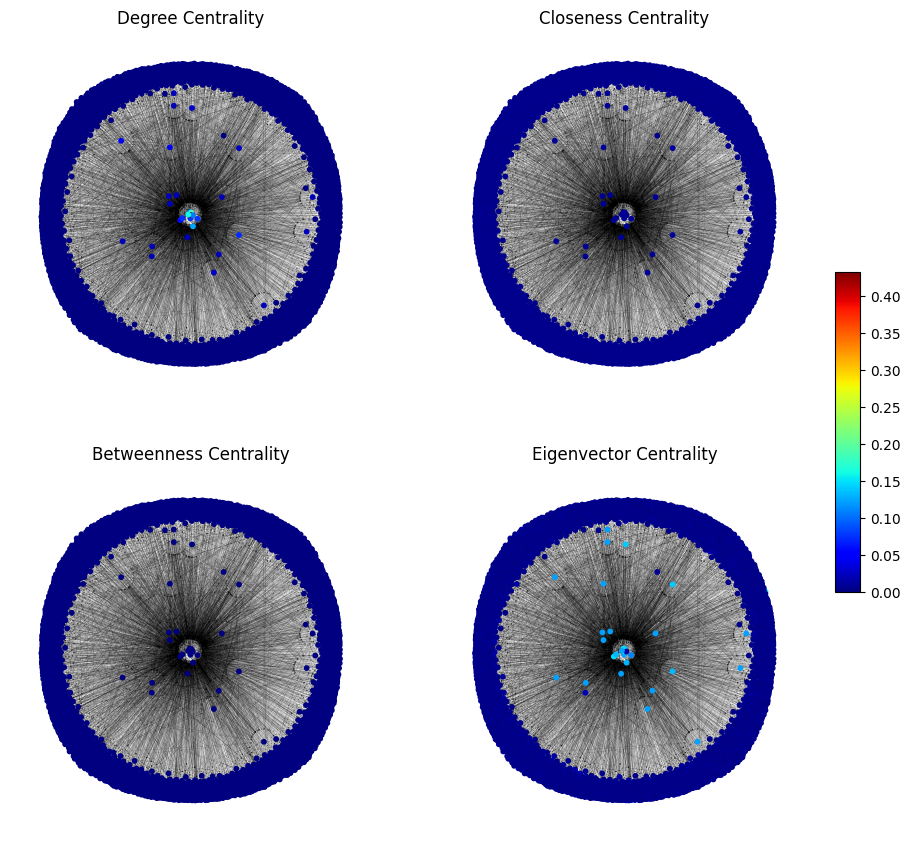

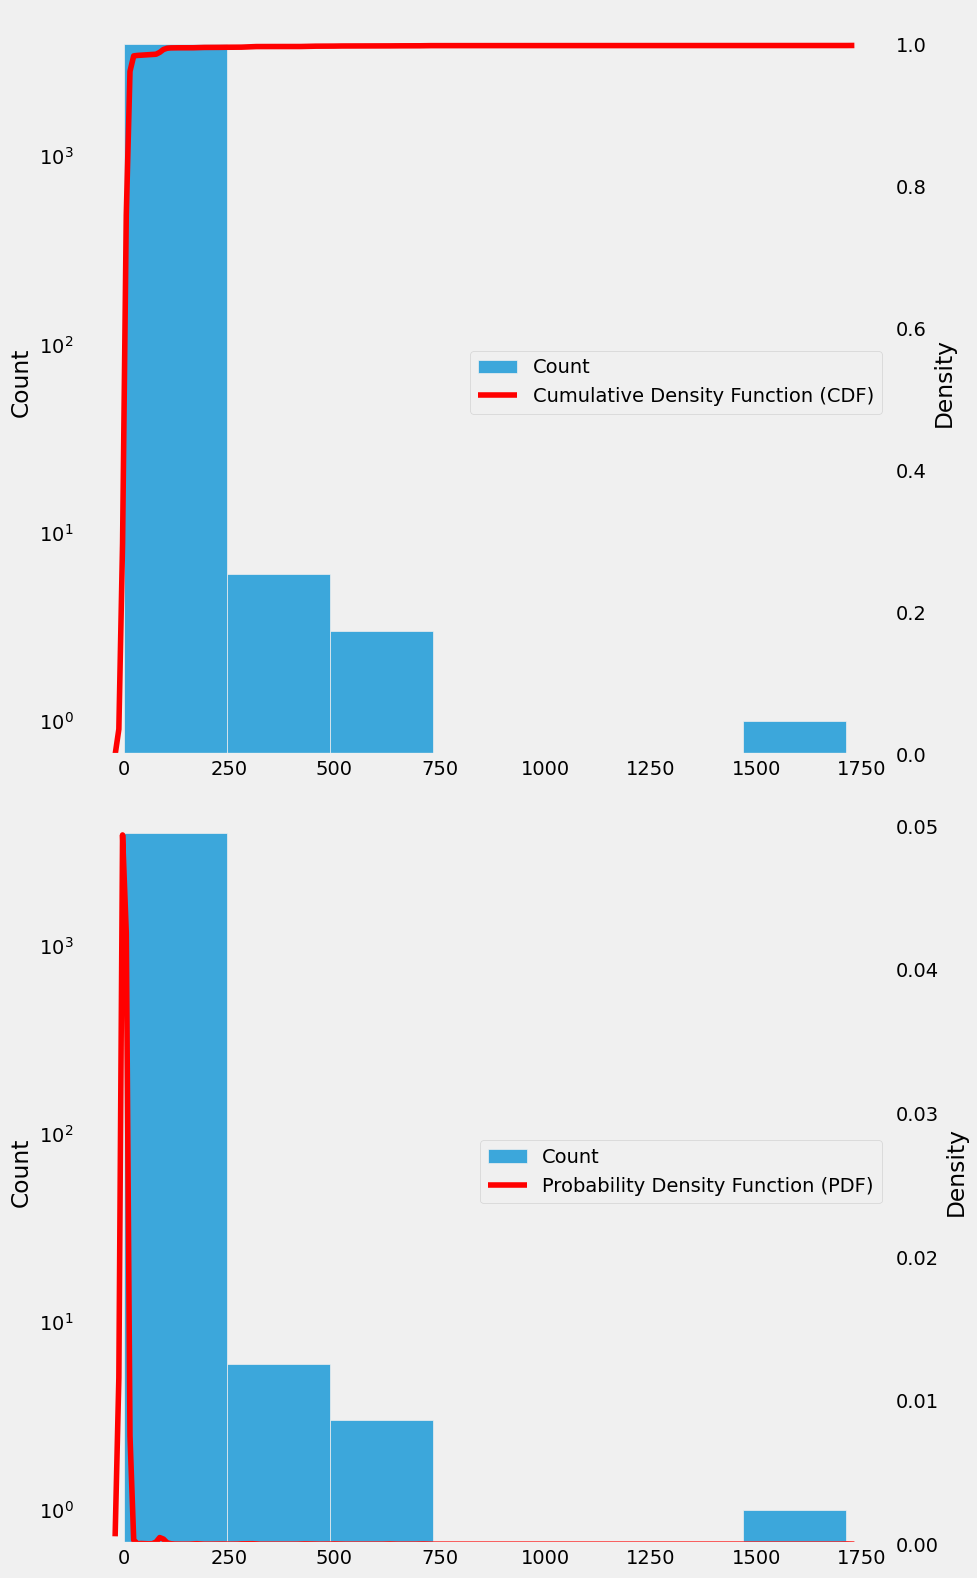

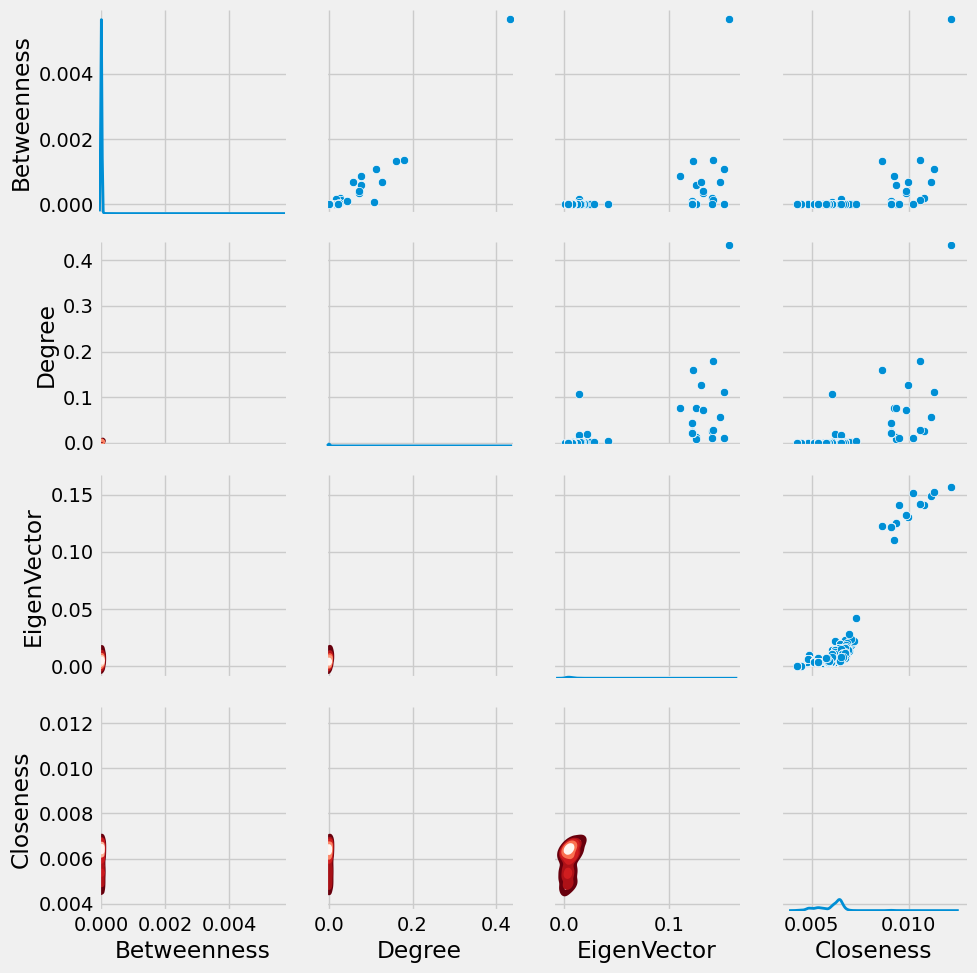

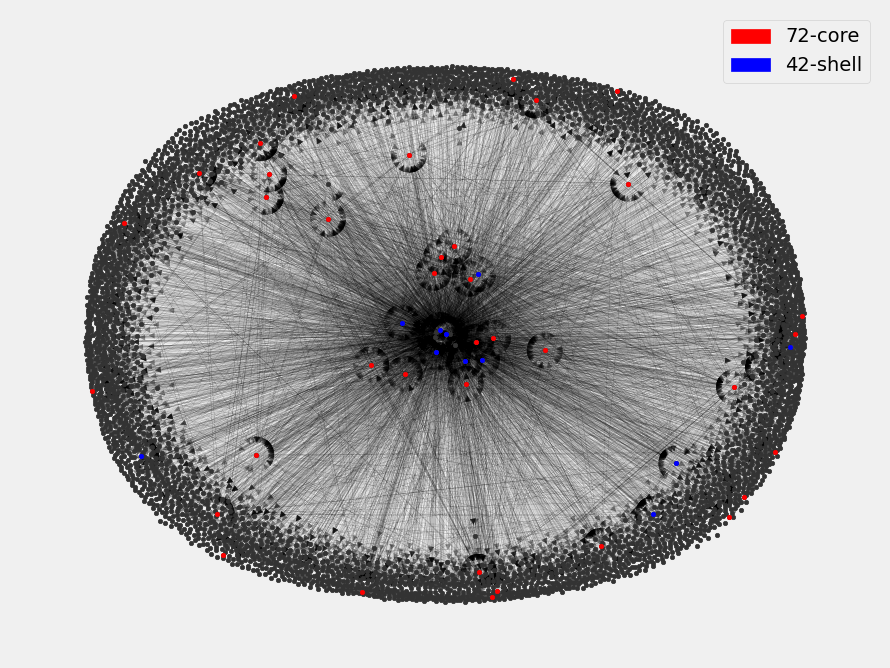

In [13]:
ppl.run(SEED, STOPS, 2)